# Model Training and Evaluation

### Importing required libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Loading the dataset

In [27]:
df = pd.read_csv("../Data/processed_churn_data.csv")

In [29]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,BalanceSalaryRatio,AgeTenureRatio
0,-0.326221,0,0.293517,2,-1.225848,1,1,1,0.021886,1,False,False,-1.199593,0.097839
1,-0.440036,0,0.198164,1,0.117350,1,0,1,0.216534,0,False,True,0.096463,0.099082
2,-1.536794,0,0.293517,8,1.333053,3,1,0,0.240687,1,False,False,1.074448,0.032613
3,0.501521,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,False,False,-1.375684,0.003728
4,2.063884,0,0.388871,2,0.785728,1,1,1,-0.365276,0,False,True,1.237904,0.129624


#### Spliting into Train/Test

In [31]:
X = df.drop(columns=['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Model Training and Evaluation

#### Logistic Regression

In [33]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print(" Logistic Regression ")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

 Logistic Regression 
Accuracy: 0.808
Confusion Matrix:
 [[1540   53]
 [ 331   76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



#### Decision Tree

In [35]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(" Decision Tree ")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

 Decision Tree 
Accuracy: 0.796
Confusion Matrix:
 [[1377  216]
 [ 192  215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1593
           1       0.50      0.53      0.51       407

    accuracy                           0.80      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.80      0.80      0.80      2000



#### Random Forest

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(" Random Forest ")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

 Random Forest 
Accuracy: 0.865
Confusion Matrix:
 [[1547   46]
 [ 224  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.45      0.58       407

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



#### XGBoost

In [39]:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(" XGBoost ")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

 XGBoost 
Accuracy: 0.855
Confusion Matrix:
 [[1507   86]
 [ 204  203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.50      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.85      2000



#### Save Best Model (Random Forest)

In [41]:
joblib.dump(rf_model, "random_forest_model.pkl")
print("\n Best model (Random Forest) saved as random_forest_model.pkl")


 Best model (Random Forest) saved as random_forest_model.pkl


#### Feature Importance Plot

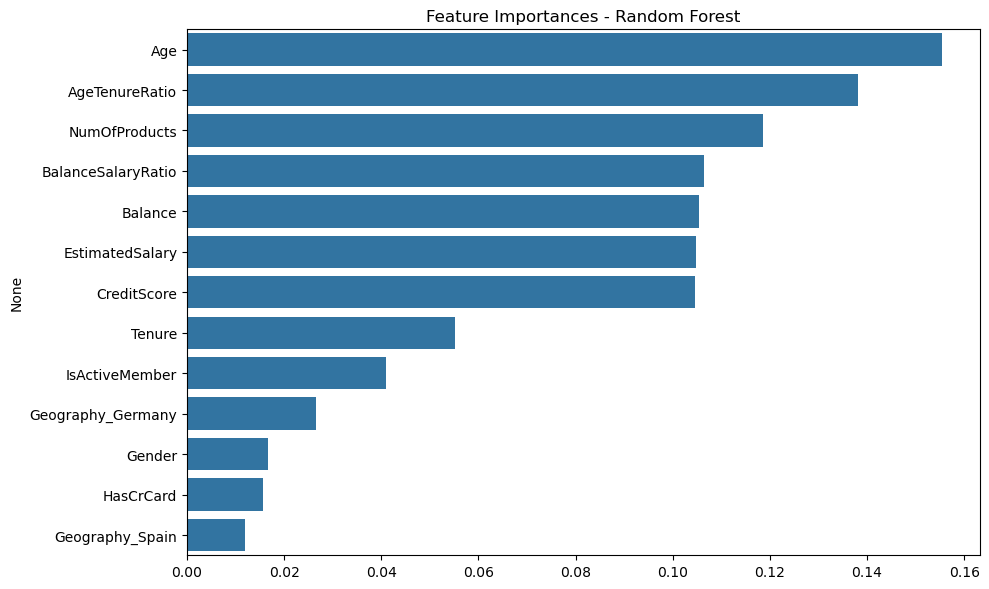

In [43]:
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

#### Confusion Matrix Heatmap (Random Forest)

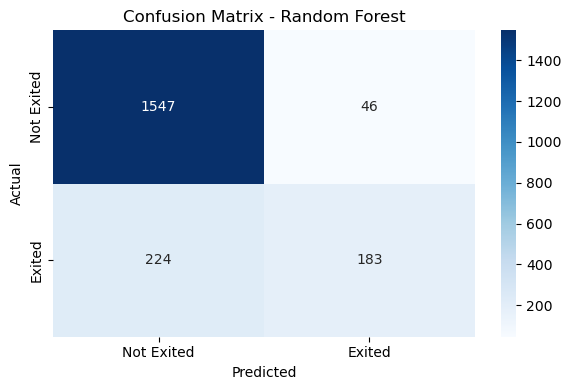

In [45]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Exited", "Exited"], yticklabels=["Not Exited", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


### Conclusion
This project successfully built a machine learning pipeline to predict customer churn. After comparing multiple models, Random Forest emerged as the most reliable with strong accuracy and generalization. This model can be deployed to assist banks in identifying at-risk customers and taking proactive measures to retain them.

In [47]:
print(df.columns.tolist())

['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'BalanceSalaryRatio', 'AgeTenureRatio']
